<a href="https://colab.research.google.com/github/tarushi1/ADG-ML-Task/blob/main/ADG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from collections import Counter # handly little tool
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.express as px # for interactive graphs
!pip install country_converter -q
import country_converter as coco

In [ ]:
#Connecting drive and colab
from google.colab import drive
drive.mount('/content/drive')
#reading the dataset
data= pd.read_csv("/content/drive/MyDrive/ADGVIT/global_ai_ml_data_salaries.csv")
#preview the tables
print(data.shape)
print(data.head())
print(data.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(19775, 11)
   work_year experience_level employment_type                 job_title  \
0       2024               MI              FT     Business Intelligence   
1       2024               MI              FT     Business Intelligence   
2       2024               SE              FT              BI Developer   
3       2024               SE              FT              BI Developer   
4       2024               SE              FT  Machine Learning Modeler   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   84021             USD          84021                 CA             0   
1   69000             USD          69000                 CA             0   
2  241600             USD         241600                 US             0   
3  109800             USD         109800                 US             0   
4  245400             U

In [ ]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,19775.000000,1.977500e+04,19775.000000,19775.000000
mean,2023.353527,1.628728e+05,150935.295322,29.886220
std,0.712468,3.128112e+05,68561.127186,45.427765
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.039770e+05,103200.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,189650.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
#handling missing values
missing_values = data.isnull().sum()
missing_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# Columns with categorical data
print("----------Categorical columns-----------")
categorical_cols = data.describe(include = 'object')
print(categorical_cols)

----------Categorical columns-----------
       experience_level employment_type       job_title salary_currency  \
count             19775           19775           19775           19775   
unique                4               4             148              24   
top                  SE              FT  Data Scientist             USD   
freq              12473           19690            4677           18420   

       employee_residence company_location company_size  
count               19775            19775        19775  
unique                 88               78            3  
top                    US               US            M  
freq                17471            17522        18421  


In [ ]:
# Columns with numerical data
print("-------------------Numerical columns----------------")
print(data.describe())
# Check unique counts of each column
print("-------------------Unique counts----------------")
print(data.loc[:,["work_year", "salary", "salary_in_usd", "remote_ratio"]].nunique())

-------------------Numerical columns----------------
          work_year        salary  salary_in_usd  remote_ratio
count  19775.000000  1.977500e+04   19775.000000  19775.000000
mean    2023.353527  1.628728e+05  150935.295322     29.886220
std        0.712468  3.128112e+05   68561.127186     45.427765
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.039770e+05  103200.000000      0.000000
50%     2023.000000  1.430000e+05  142200.000000      0.000000
75%     2024.000000  1.900000e+05  189650.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000
-------------------Unique counts----------------
work_year           5
salary           2925
salary_in_usd    3319
remote_ratio        3
dtype: int64


In [ ]:
# Convert categorical variables using one-hot encoding
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded dataset
data_encoded.head()

,work_year,salary,salary_currency,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,2024,84021,USD,84021,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2024,69000,USD,69000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2024,241600,USD,241600,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
3,2024,109800,USD,109800,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,2024,245400,USD,245400,100,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded['salary_in_usd'] = scaler.fit_transform(data_encoded[['salary_in_usd']])

# Display summary statistics to verify standardization
data_encoded.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,19775.000000,1.977500e+04,1.977500e+04,19775.000000
mean,2023.353527,1.628728e+05,-2.874509e-17,29.886220
std,0.712468,3.128112e+05,1.000025e+00,45.427765
min,2020.000000,1.400000e+04,-1.982738e+00,0.000000
25%,2023.000000,1.039770e+05,-6.962619e-01,0.000000
50%,2023.000000,1.430000e+05,-1.274121e-01,0.000000
75%,2024.000000,1.900000e+05,5.646886e-01,100.000000
max,2024.000000,3.040000e+07,9.467189e+00,100.000000


In [ ]:
# Define the target variable and features
X = data_encoded.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = data_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15820, 327), (3955, 327), (15820,), (3955,))

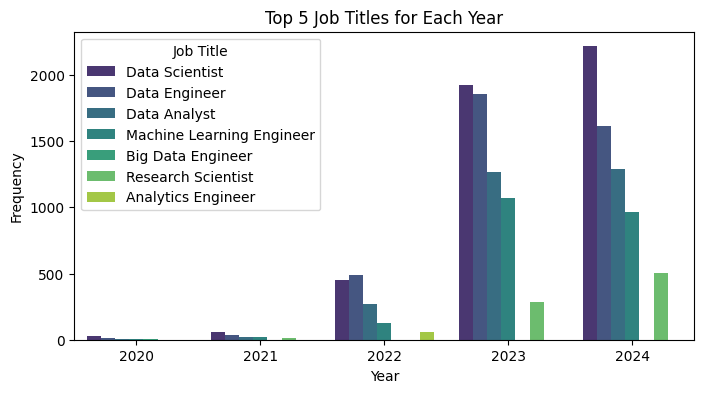

In [ ]:
#Most frequent job titles for each year

# Group by work_year and job_title, then count the occurrences
job_counts = data.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Get the top job titles for each year
top_5_jobs_per_year = job_counts.groupby('work_year').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(x='work_year', y='count', hue='job_title', data=top_5_jobs_per_year, palette='viridis')
plt.title('Top 5 Job Titles for Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Job Title')
plt.show()

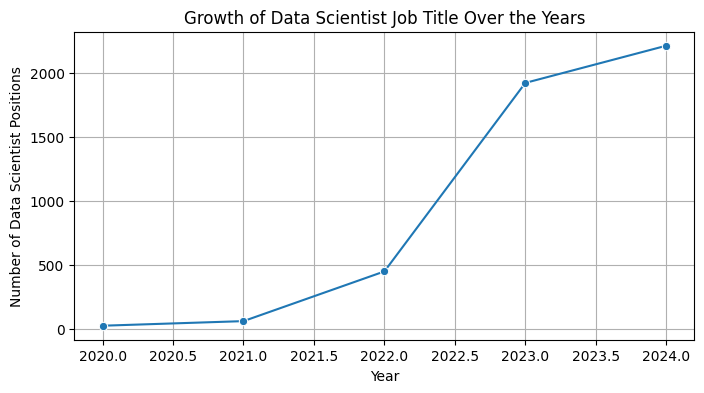

In [ ]:
#Groth of "Data Scientist" job title over the years

# Filter for the "Data Scientist" job title
data_scientist_data = data[data['job_title'] == 'Data Scientist']

# Group by work_year and count the occurrences
data_scientist_growth = data_scientist_data.groupby('work_year').size().reset_index(name='count')

# Plot the growth
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_scientist_growth, x='work_year', y='count', marker='o')
plt.title('Growth of Data Scientist Job Title Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Data Scientist Positions')
plt.grid(True)
plt.show()

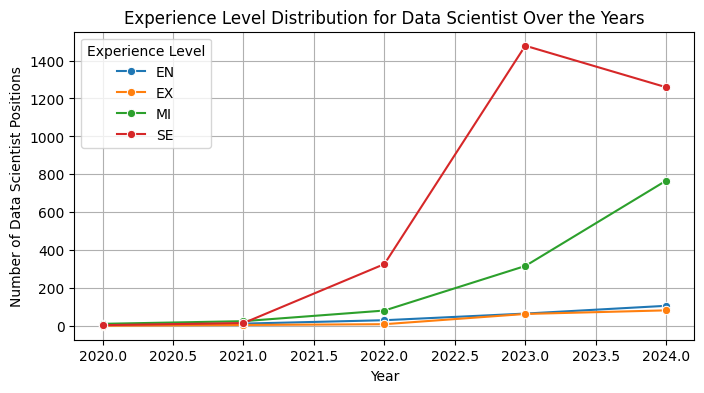

In [ ]:
# Filter for the "Data Scientist" job title
data_scientist_data = data[data['job_title'] == 'Data Scientist']

# Group by work_year and experience_level, then count the occurrences
experience_level_over_years = data_scientist_data.groupby(['work_year', 'experience_level']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(8, 4))
sns.lineplot(data=experience_level_over_years, x='work_year', y='count', hue='experience_level', marker='o')
plt.title('Experience Level Distribution for Data Scientist Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Data Scientist Positions')
plt.legend(title='Experience Level')
plt.grid(True)
plt.show()

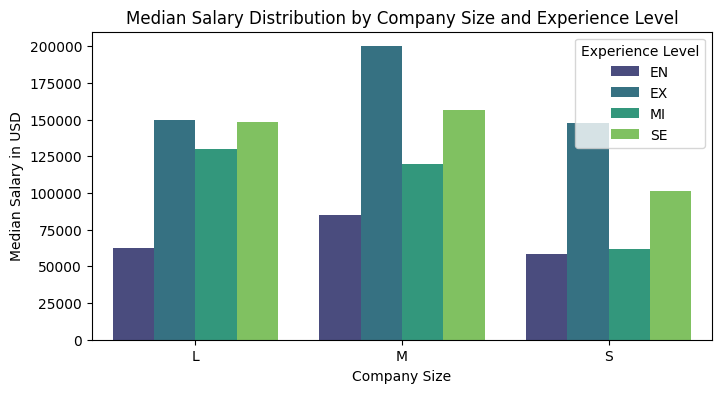

In [ ]:
# Group by company_size and experience_level, then calculate the median salary
median_salary = data.groupby(['company_size', 'experience_level'])['salary_in_usd'].median().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='company_size', y='salary_in_usd', hue='experience_level', data=median_salary, palette='viridis')
plt.title('Median Salary Distribution by Company Size and Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Median Salary in USD')
plt.legend(title='Experience Level')
plt.show()

In [ ]:
rr = data.groupby('company_location')['remote_ratio'].mean().reset_index()
rr['company_location'] =  coco.convert(names = rr['company_location'], to = "ISO3")
rr.head()

fig = px.choropleth(rr,
                    locations = rr.company_location,
                    color = rr.remote_ratio,
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
fig.update_layout(title = "Remote Jobs Locations")
fig.show()

In [ ]:
# Create a new feature for experience level categories
experience_mapping = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior-level', 'EX': 'Executive-level'}
data['experience_category'] = data['experience_level'].map(experience_mapping)

# Create a new feature for remote work ratio groups
def remote_work_group(remote_ratio):
    if remote_ratio == 0:
        return 'No Remote Work'
    elif remote_ratio == 50:
        return 'Partially Remote'
    elif remote_ratio == 100:
        return 'Fully Remote'
    else:
        return 'Unknown'

data['remote_work_category'] = data['remote_ratio'].apply(remote_work_group)

# Display the first few rows to verify the new features
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,remote_work_category
0,2024,MI,FT,Business Intelligence,84021,USD,84021,CA,0,CA,M,Mid-level,No Remote Work
1,2024,MI,FT,Business Intelligence,69000,USD,69000,CA,0,CA,M,Mid-level,No Remote Work
2,2024,SE,FT,BI Developer,241600,USD,241600,US,0,US,M,Senior-level,No Remote Work
3,2024,SE,FT,BI Developer,109800,USD,109800,US,0,US,M,Senior-level,No Remote Work
4,2024,SE,FT,Machine Learning Modeler,245400,USD,245400,US,100,US,M,Senior-level,Fully Remote


In [ ]:
# One-hot encode the new categorical features
data = pd.get_dummies(data, columns=['experience_category', 'remote_work_category', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'])

# Define the target variable and features
X = data.drop(columns=['salary', 'salary_currency', 'salary_in_usd', 'experience_level', 'remote_ratio'])
y = data['salary_in_usd']

# Perform feature importance analysis using a random forest model
from sklearn.ensemble import RandomForestRegressor

# Fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 important features
feature_importances.head(10)


,importance
employee_residence_US,0.192490
job_title_Data Analyst,0.167577
experience_category_Senior-level,0.093471
experience_category_Executive-level,0.054762
job_title_Machine Learning Engineer,0.054071
work_year,0.047373
employee_residence_CA,0.034978
job_title_Research Scientist,0.034854
job_title_Research Engineer,0.020055
remote_work_category_No Remote Work,0.017303


In [ ]:
# Select the top 10 important features
top_features = feature_importances.head(10).index
X_selected = X[top_features]

# Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15820, 10), (3955, 10), (15820,), (3955,))

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Evaluate model performance

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Calculate performance metrics for linear regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate performance metrics for decision tree
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

# Calculate performance metrics for random forest
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
r2_forest = r2_score(y_test, y_pred_forest)

# Display the performance metrics
print("Linear Regression Performance:")
print(f"MAE: {mae_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, R^2: {r2_linear}")

print("\nDecision Tree Performance:")
print(f"MAE: {mae_tree}, MSE: {mse_tree}, RMSE: {rmse_tree}, R^2: {r2_tree}")

print("\nRandom Forest Performance:")
print(f"MAE: {mae_forest}, MSE: {mse_forest}, RMSE: {rmse_forest}, R^2: {r2_forest}")


Linear Regression Performance:
MAE: 44872.17758020782, MSE: 3793147450.960016, RMSE: 61588.53343732107, R^2: 0.24365271014748535

Decision Tree Performance:
MAE: 44479.42586686448, MSE: 3748518776.7441173, RMSE: 61225.14823782885, R^2: 0.2525515935231798

Random Forest Performance:
MAE: 44383.39809262935, MSE: 3727750805.9076614, RMSE: 61055.309399819285, R^2: 0.25669269234967385


In [ ]:
## Random Forest has the best performance

import time
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Track the start time
start_time = time.time()

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_model.predict(X_test)

# Calculate performance metrics for the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train)

# Calculate performance metrics on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Display the performance metrics on the training set
print("\nTraining Set Performance (Best Model - Random Forest):")
print(f"MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R^2: {r2_train}")

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)

# Calculate performance metrics on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Display the performance metrics on the test set
print("\nTest Set Performance (Best Model - Random Forest):")
print(f"MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R^2: {r2_test}")

# Compare training and test performance to ensure the model generalizes well
print("\nPerformance Comparison (Training vs Test):")
print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Training R^2: {r2_train}, Test R^2: {r2_test}")



Training Set Performance (Best Model - Random Forest):
MAE: 42147.95858227926, MSE: 3304242069.282133, RMSE: 57482.53708111824, R^2: 0.2849706358128882

Test Set Performance (Best Model - Random Forest):
MAE: 44327.61520890003, MSE: 3714769435.2633924, RMSE: 60948.90840091718, R^2: 0.25928115605489543

Performance Comparison (Training vs Test):
Training RMSE: 57482.53708111824, Test RMSE: 60948.90840091718
Training R^2: 0.2849706358128882, Test R^2: 0.25928115605489543
